# ELBOW METHOD

### Running the tests on this notebook are extremely time consuming so I separated them into their own file so I can run them in paralellel to my main notebook 

In [ ]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#imports to help me plot my venn diagrams
import matplotlib_venn as venn2
from matplotlib_venn import venn2
from pylab import rcParams

# import the util.py file where I define my functions
from utils import *

# sklearn
from sklearn.preprocessing import StandardScaler, Imputer, RobustScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LinearRegression


# magic word for producing visualizations in notebook
%matplotlib inline

import time
from timeit import default_timer as timer

Loading Files I want to use to test with Elbow Method

In [2]:
azdias_SS = pd.read_pickle(r"C:\Users\sousa\Desktop\github\Arvato\data\azdias_SS.pickle")
azdias_MMS = pd.read_pickle(r"C:\Users\sousa\Desktop\github\Arvato\data\azdias_MMS.pickle")

### I will sample just a few data points since this is ectremely time consuming
### In the future and with time I will attempt to run the entire dataset

In [3]:
azdias_SS = azdias_SS[:20000]
azdias_MMS = azdias_MMS[:20000]

Based on the information aquired in the Arvato workbook I will be using 150 components based on the scree-plot curves

In [4]:
pca = PCA(150)
azdias_pca_SS = pca.fit_transform(azdias_SS)
azdias_pca_MMS = pca.fit_transform(azdias_MMS)

In [6]:
def elbow_method(data):
    scores = []
    centers = list(range(1,20))
    i = 0
    for center in centers:
        i += 1
        print(i)
        scores.append(fit_kmeans(data, center))
        
    # Investigate the change in within-cluster distance across number of clusters.
    # Plot the original data with clusters
    plt.plot(centers, scores, linestyle='--', marker='o', color='b')
    plt.ylabel('SSE score')
    plt.xlabel('K')
    plt.title('SSE vs K')

    #Using a regression to determine where it is a good cluster number to divide the population (when the gradient decreases)
    l_reg = LinearRegression()
    l_reg.fit(X=np.asarray([[9,10,11,12,13,14]]).reshape(6,1), y=scores[8:14])
    predicted =l_reg.predict(np.asarray(range(2,9)).reshape(-1,1))
    plt.plot(list(range(2,20)),np.asarray(list(predicted.reshape(-1,1)) + list(scores[8:20])),'r')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Wall time: 8min 36s


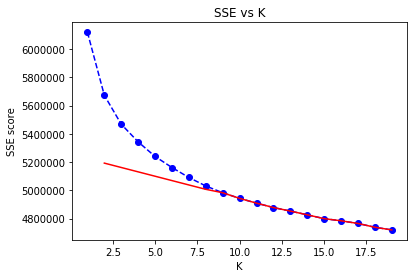

In [7]:
%%time
elbow_method(azdias_pca_SS)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Wall time: 7min 59s


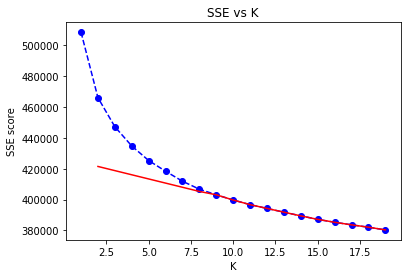

In [8]:
%%time
elbow_method(azdias_pca_MMS)